In [2]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

[('Salaries',)]


In [4]:
df = pd.read_sql("""select * from Salaries""",conn)

In [5]:
df.shape

(148654, 13)

In [6]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
dtype: object

In [7]:
df.BasePay.unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, 'Not Provided'],
      dtype=object)

In [8]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [9]:
# 1. usinh sql implementation(Retrieve the top 8 rows from the table.)
top_8_rows = pd.read_sql("""select * from Salaries limit 8""",conn)
top_8_rows

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [10]:
# 1. pandas i8mplementation(Retrieve the top 8 rows from the table.)
top_8_rows = df.head(8)
top_8_rows

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [11]:
# 2. sql implementation(What is the average TotalPay?)
avg_total_pay = pd.read_sql("""select avg(TotalPay) from Salaries""",conn)
avg_total_pay

,avg(TotalPay)
0,74768.321972


In [12]:
# 2. pandas implementation(What is the average TotalPay?)
avg_total_pay = df['TotalPay'].mean()
avg_total_pay

74768.321971703

In [13]:
# 3. What is the highest amount of BasePay in the dataset?(using sql)
pd.read_sql("""select max(BasePay) from Salaries where BasePay!='Not Provided' and BasePay!='';""",conn)

,max(BasePay)
0,319275.01


In [14]:
df['BasePay'] = df['BasePay'].replace('Not Provided',df['BasePay'].mode()[0])

In [15]:
df['BasePay'].astype('category').value_counts()

0           1302
             605
54703        338
55026        297
48472.4      210
            ... 
42855.11       1
42854.05       1
42853.98       1
42853.83       1
60321.64       1
Name: BasePay, Length: 109490, dtype: int64

In [16]:
df['BasePay'] = df['BasePay'].replace('',df['BasePay'].mode()[0])

In [17]:
df['BasePay'].astype('category').value_counts()

0.0          1907
54703.0       338
55026.0       297
48472.4       210
65448.0       153
             ... 
42854.05        1
42853.98        1
42853.83        1
42853.38        1
319275.01       1
Name: BasePay, Length: 109489, dtype: int64

In [18]:
# 3. What is the highest amount of BasePay in the dataset?(using pandas)
high_bpay = df['BasePay'].max()
high_bpay

319275.01

In [19]:
# 4. What is the Job title of 'NATHANIEL FORD'?(using sql query)
job_title = pd.read_sql("""select JobTitle from Salaries where EmployeeName = 'NATHANIEL FORD';""",conn)
job_title

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [20]:
# 4. What is the Job title of 'NATHANIEL FORD'?(using pandas)
job_title = df.loc[(df.EmployeeName == 'NATHANIEL FORD'),'JobTitle']
job_title

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

In [21]:
# 5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?(using sql query)
tot_bill_by_nathaniel = pd.read_sql("""select TotalPayBenefits from Salaries where EmployeeName=='NATHANIEL FORD';""",conn)
tot_bill_by_nathaniel

,TotalPayBenefits
0,567595.43


In [22]:
# 5. How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?(using pandas)
tot_bill_by_nathaniel = df.loc[(df.EmployeeName=='NATHANIEL FORD','TotalPayBenefits')]
tot_bill_by_nathaniel

0    567595.43
Name: TotalPayBenefits, dtype: float64

In [23]:
# 6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)(using sql query)
yearly_avg_tot_pay = pd.read_sql("""select Year,avg(TotalPay) from Salaries group by Year;""",conn)
yearly_avg_tot_pay

,Year,avg(TotalPay)
0,2011,71744.103871
1,2012,74113.262265
2,2013,77611.443142
3,2014,75463.918140


In [24]:
# 6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)(using pandas)
df.groupby('Year')['TotalPay'].mean()

Year
2011    71744.103871
2012    74113.262265
2013    77611.443142
2014    75463.918140
Name: TotalPay, dtype: float64

In [25]:
# 7. How many unique jobs are there?(using sql query)
unique_jobs = pd.read_sql("""select distinct(JobTitle) from Salaries""",conn)
unique_jobs

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT)
2,WIRE ROPE CABLE MAINTENANCE MECHANIC
3,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"
4,ASSISTANT DEPUTY CHIEF II
...,...
2154,"Sr Cnselor, Juv Hall (SFERS)"
2155,Forensic Toxicologist Supervis
2156,Conversion
2157,Cashier 3


In [26]:
# 7. How many unique jobs are there?(using pandas)
df.JobTitle.sort_values().unique()

array(['ACCOUNT CLERK', 'ACCOUNTANT', 'ACCOUNTANT INTERN', ...,
       'YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS',
       'Youth Comm Advisor', 'ZOO CURATOR'], dtype=object)

In [27]:
len(df.JobTitle.unique())

2159

In [28]:
# 8. What are the top 5 most common jobs?(using sql query)
five_common_jobs = pd.read_sql("""SELECT JobTitle, COUNT(JobTitle) as `value_occurrence` from Salaries 
    group by JobTitle order by `value_occurrence` desc limit 5;""",conn)
five_common_jobs

,JobTitle,value_occurrence
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [29]:
# 8. What are the top 5 most common jobs?(using pandas)
df['JobTitle'].value_counts()[:5].sort_values(ascending=False)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

In [30]:
# 9. How many people have the word Chief in their job title?(using sql query)
chief_in_job = pd.read_sql("""select count(JobTitle) from Salaries where JobTitle like '%Chief%';""",conn)
chief_in_job

,count(JobTitle)
0,627


In [31]:
# 9. How many people have the word Chief in their job title?(using pandas)
len(df[df.JobTitle.str.contains('Chief|CHIEF')])

627

# EDA on this data set

In [32]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [33]:
# checking if there any null value present or not
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

as above result there is no null value but there is a chance of that the representation of null value is different

In [34]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [35]:
# First of all there is no need of id column, so basically drop it
df.drop(['Id'],axis=1,inplace=True)


In [36]:
df.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,Roy I Tillery,Custodian,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,Not provided,Not provided,0.0,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,Not provided,Not provided,0.0,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,Not provided,Not provided,0.0,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0,-618.13,0,-618.13,-618.13,2014,,San Francisco,PT


In [37]:
df[(df['EmployeeName']=='Not Provided') | (df['EmployeeName']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
13797,Not Provided,PUBLIC SAFETY COMMUNICATIONS DISPATCHER,57963.39,19683.91,4373.86,,82021.16,82021.16,2011,,San Francisco,
44151,Not Provided,Public SafetyComm Disp,82196.52,25934.20,3752.49,38024.3,111883.21,149907.51,2012,,San Francisco,
148646,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148650,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,Not provided,Not provided,0.00,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


here above we can see that there are some rows which contains Not Provided as data, the no. of rows is very less as compared to dataset so we can remove it.

In [38]:
df = df.drop((df[df['EmployeeName'] == 'Not Provided']).index)

In [39]:
df = df.drop((df[df['EmployeeName'] == 'Not provided']).index)

In [40]:
df.tail()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148645,Carolyn A Wilson,Human Services Technician,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148648,Leon Walker,Custodian,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148649,Roy I Tillery,Custodian,0.0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148653,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0,-618.13,0,-618.13,-618.13,2014,,San Francisco,PT


In [41]:
# NOw there is almost no entry with EmployeeName Not Provided

In [42]:
# lets check for verification

In [43]:
df['EmployeeName'].unique()

array(['NATHANIEL FORD', 'GARY JIMENEZ', 'ALBERT PARDINI', ...,
       'Mark W Mcclure', 'Charlene D Mccully', 'Joe Lopez'], dtype=object)

#### For Job Title

In [44]:
df[(df['JobTitle']=='Not Provided') | (df['JobTitle']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [45]:
# There is no null value as well as no Job TItle is 'Not Provided'

#### For Base Pay

In [46]:
df[(df['BasePay']=='Not Provided') | (df['BasePay']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [47]:
# There is no null value as well as no BasePay Not Provided'

#### For Overtime pay

In [48]:
df[(df['OvertimePay']=='Not Provided') | (df['OvertimePay']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [49]:
# There is no null value as well as no OvertimePay Not Provided'

#### For OtherPay

In [50]:
df[(df['OtherPay']=='Not Provided') | (df['OtherPay']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [51]:
# There is no null value as well as no OtherPay Not Provided'

#### For Benefits

In [52]:
df[(df['Benefits']=='Not Provided') | (df['Benefits']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [53]:
# There is no null value as well as no Benefits Not Provided'

#### For TotalPay

In [54]:
df[(df['TotalPay']=='Not Provided') | (df['TotalPay']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [55]:
# There is no null value as well as no Benefits Not Provided'

#### For TotalPayBenefits 

In [56]:
df[(df['TotalPayBenefits']=='Not Provided') | (df['TotalPayBenefits']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [57]:
# There is no null value as well as no TotalPayBenefits Not Provided'

#### For Year

In [58]:
df[(df['Year']=='Not Provided') | (df['Year']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [59]:
# There is no null value as well as no TotalPayBenefits Not Provided'

#### For Notes

In [60]:
df[(df['Notes']=='Not Provided') | (df['Notes']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [61]:
# There is no null value as well as no Notes Not Provided'

#### For Agency

In [62]:
df[(df['Agency']=='Not Provided') | (df['Agency']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [63]:
# There is no null value as well as no Agency Not Provided'

#### For Status

In [64]:
df[(df['Status']=='Not Provided') | (df['Status']=='Not provided')]

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [65]:
# There is no null value as well as no Status Not Provided'

### Now I am confirmed that there is no place in dataset having 'Not Provided'

In [66]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


#### In benefits, Notes and Status column there are blanc values, we need to handle that

#### For Benefits

In [67]:
df.Benefits.astype('category').value_counts()

            36158
0            1734
7959.18       348
4659.36       107
25699.2        83
            ...  
24350.42        1
24349.9         1
24349.81        1
24348.15        1
28792.91        1
Name: Benefits, Length: 98465, dtype: int64

#### Blank value occurs for more than 36k times , so if we replace it with mode there will be no change, so we can replace it with mean

In [68]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Agency               object
Status               object
dtype: object

In [69]:
# Benefits is of object type which is wrong type, we need to convert it to float

In [70]:
df = df.astype({'Benefits':float})

ValueError: could not convert string to float: ''

In [71]:
# above error will not let me do type conversion,we can try to replace '' with 0 and then try to do mean

In [72]:
df.Benefits = df.Benefits.replace('',0)

In [73]:
df.Benefits = df.Benefits.replace(0,df.Benefits.mean())

In [74]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,18924.740892,567595.43,567595.43,2011,,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011,,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011,,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011,,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,18924.740892,326373.19,326373.19,2011,,San Francisco,


#### For Notes

In [75]:
# Total Pay is already in type float, so no need to type conversion
df.Notes.unique()

array([''], dtype=object)

In [76]:
# There is no data in Notes column so we could delete it
df = df.drop(['Notes'],axis=1)

In [77]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,18924.740892,567595.43,567595.43,2011,San Francisco,
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011,San Francisco,
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011,San Francisco,
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011,San Francisco,
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,18924.740892,326373.19,326373.19,2011,San Francisco,


#### For Status

In [78]:
df.Status.astype('category').value_counts()

      110529
FT     22334
PT     15785
Name: Status, dtype: int64

In [79]:
# here more than 1 lac values are blank

In [80]:
len(df[df['Status']==''])

110529

In [81]:
import numpy as np
Status_choice = ['FT','PT']
df.Status = np.where((df['Status']==''),np.random.choice(Status_choice, size=len(df)),df['Status'])

In [82]:
df.Status.astype('category').value_counts()

FT    77581
PT    71067
Name: Status, dtype: int64

### Now df will be look like 

In [83]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,18924.740892,567595.43,567595.43,2011,San Francisco,FT
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011,San Francisco,FT
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011,San Francisco,PT
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011,San Francisco,PT
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,18924.740892,326373.19,326373.19,2011,San Francisco,PT


### with no missing value and no ' ' and no 'Not Provided'

In [84]:
import seaborn as sns

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BasePay', ylabel='Density'>

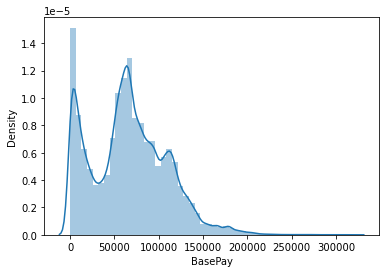

In [85]:
sns.distplot(df['BasePay'])

#### From above graph we can see that the dataset is not in bell shaped curve and we need to normalise it.

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BasePay'>

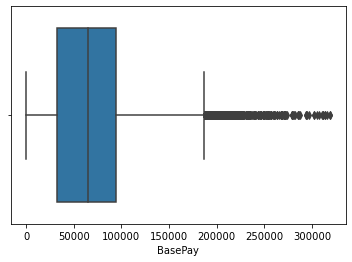

In [86]:
sns.boxplot(df['BasePay'])

#### In above graph we can see that there are alot of outliers present in dataset

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OvertimePay', ylabel='Density'>

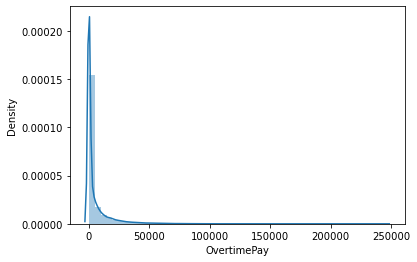

In [87]:
sns.distplot(df['OvertimePay'])

#### above graph is in bell shape but very highly right skewed, we also need to normalise it

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OvertimePay'>

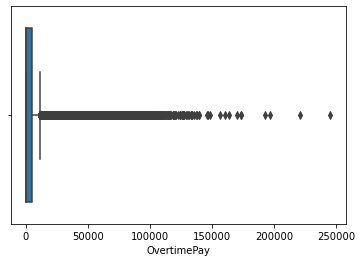

In [88]:
sns.boxplot(df['OvertimePay'])

#### There are alot of outliers in this column

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OtherPay', ylabel='Density'>

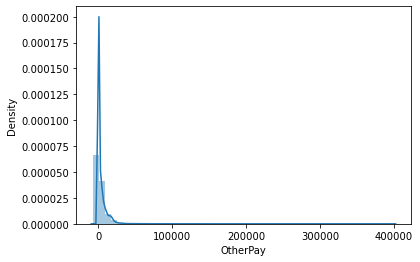

In [89]:
sns.distplot(df['OtherPay'])

#### The graph above is exactly like the graph of OvertimePay, we need to normalise it

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Benefits', ylabel='Density'>

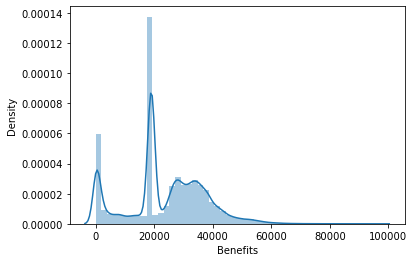

In [90]:
sns.distplot(df['Benefits'])

#### data in this columns are distributed alot, we need to normalise it. also there are many outliers in this column.

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalPay', ylabel='Density'>

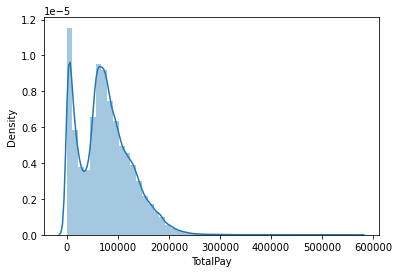

In [91]:
sns.distplot(df['TotalPay'])

#### above graph have some outliers and almost in bell shape, we will normalise it.

/home/ronak/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalPayBenefits', ylabel='Density'>

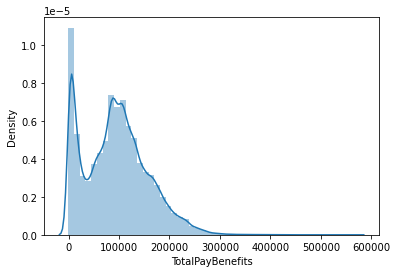

In [92]:
sns.distplot(df['TotalPayBenefits'])

#### graph above is also like the graph of Total Pay

In [93]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,18924.740892,567595.43,567595.43,2011,San Francisco,FT
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011,San Francisco,FT
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011,San Francisco,PT
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011,San Francisco,PT
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182234.59,18924.740892,326373.19,326373.19,2011,San Francisco,PT


In [94]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [95]:
# we need to convert some numeric type to int or float
df = df.astype({'OvertimePay':float,'OtherPay':float,})

In [96]:
df.dtypes

EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [97]:
num_col = df.select_dtypes(include=['int64','float64'])
num_col

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,167411.18,0.00,400184.25,18924.740892,567595.43,567595.43,2011
1,155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011
2,212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011
3,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011
4,134401.60,9737.00,182234.59,18924.740892,326373.19,326373.19,2011
...,...,...,...,...,...,...,...
148645,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148647,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148648,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148649,0.00,0.00,0.00,18924.740892,0.00,0.00,2014


In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(num_col),columns=['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits','Year'])

In [101]:
scaled_data

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,2.363374,-0.442266,49.218538,-0.359494,9.755775,7.547086,-1.362494
1,2.096500,20.958728,16.652451,-0.359494,9.187916,7.090246,-1.362494
2,3.420313,8.819656,1.589230,-0.359494,5.156950,3.847355,-1.362494
3,0.276560,4.457296,24.161240,-0.359494,5.098824,3.800593,-1.362494
4,1.593669,0.407813,22.166322,-0.359494,4.980636,3.705511,-1.362494
...,...,...,...,...,...,...,...
148643,-1.540255,-0.442266,-0.452889,-0.359494,-1.480118,-1.492132,1.322016
148644,-1.540255,-0.442266,-0.452889,-0.359494,-1.480118,-1.492132,1.322016
148645,-1.540255,-0.442266,-0.452889,-0.359494,-1.480118,-1.492132,1.322016
148646,-1.540255,-0.442266,-0.452889,-0.359494,-1.480118,-1.492132,1.322016


In [102]:
obj_col = df.select_dtypes(include=['object'])

In [103]:
obj_col


,EmployeeName,JobTitle,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,FT
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,PT
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,PT
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,PT
...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,San Francisco,PT
148647,Joann Anderson,Communications Dispatcher 2,San Francisco,PT
148648,Leon Walker,Custodian,San Francisco,PT
148649,Roy I Tillery,Custodian,San Francisco,PT


In [104]:
new_df = pd.concat([obj_col,num_col],axis=1)

In [105]:
new_df

,EmployeeName,JobTitle,Agency,Status,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,FT,167411.18,0.00,400184.25,18924.740892,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT,155966.02,245131.88,137811.38,18924.740892,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,PT,212739.13,106088.18,16452.60,18924.740892,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,PT,77916.00,56120.71,198306.90,18924.740892,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,PT,134401.60,9737.00,182234.59,18924.740892,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...,...,...,...
148645,Carolyn A Wilson,Human Services Technician,San Francisco,PT,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148647,Joann Anderson,Communications Dispatcher 2,San Francisco,PT,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148648,Leon Walker,Custodian,San Francisco,PT,0.00,0.00,0.00,18924.740892,0.00,0.00,2014
148649,Roy I Tillery,Custodian,San Francisco,PT,0.00,0.00,0.00,18924.740892,0.00,0.00,2014


Now our data is ready to go in ML model